### 1. Data Load
### 2. 국적분포
### 3. 학과분포

In [23]:
import os
import nltk
from nltk.corpus import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data load

### 0) Journal List

In [24]:
journalList = ["BMC Bioinformatics", "Genomics & Informatics", "Algorithms for Molecular Biology _ AMB", "BMC Systems Biology", "Journal of Computational Biology", "Briefings in Bioinformatics", "BMC Genomics", "Nucleic Acids Research", "American Journal of Human Genetics", "Oncogenesis", "Disease Markers", "Microarrays"]

### 1) Affliation Load

In [25]:
path = "C:/Temp/인공지능2015전체/"
AD_2015_raw= []
for i in range(12):
    path2=path + "Affliliation/" + journalList[i]+"_AD_2015.txt"
    text_file=open(path2,"r",encoding='utf-8')
    AD_2015_raw.append(text_file.read().split('\n'))

## 2) Title Load

In [26]:
title_2015_raw= []
for i in range(12):
    path2=path +  "Title/" + journalList[i]+"_TI_2015.txt"
    text_file=open(path2,"r",encoding='utf-8')
    title_2015_raw.append(text_file.read().split('\n'))

## 3) raw Abstract  Load

In [27]:
AB_2015_raw= []
for i in range(12):
    path2=path +  "Abstract/" + journalList[i]+"_AB_2015.txt"
    text_file=open(path2,"r",encoding='utf-8')
    AB_2015_raw.append(text_file.read().split('\n'))

## 4) preprocessed Abstract Load

In [28]:
AB_2015= []
for i in range(12):
    path2=path +"Preprocessed/"+"corpus_preprocessed"+str(i)+'.txt'
    text_file=open(path2,"r",encoding='utf-8')
    AB_2015.append(text_file.read().split('\n'))

### Data Frame 으로 만들기

In [29]:
name=[]
for i in range(12):
    for j in range(len(title_2015_raw[i])):
        name.append(journalList[i])

In [30]:
len(name)

4186

In [31]:
title_2015 = [y for x in title_2015_raw for y in x]
AB_2015 = [y for x in AB_2015 for y in x]
AD_2015 = [y for x in AD_2015_raw for y in x]

In [32]:
list_2015 = pd.DataFrame({'journal':name,'TI':title_2015,'AB':AB_2015,'AD':AD_2015})

In [33]:
list_2015.head()

,journal,TI,AB,AD
0,BMC Bioinformatics,Multi-label multi-instance transfer learning f...,Signaling pathways play important roles in the...,0000 0004 1759 8467grid.263484.fSoftware Colle...
1,BMC Bioinformatics,BigQ: a NoSQL based framework to handle genomi...,Precision medicine requires the tight integrat...,Dipartimento di Ingegneria Industriale e dell’...
2,BMC Bioinformatics,Pathosphere.org: pathogen detection and charac...,The detection of pathogens in complex sample b...,0000 0000 9091 7592grid.418402.bBiosciences Di...
3,BMC Bioinformatics,"Treelink: data integration, clustering and vis...",Phylogenetic trees are central to a wide range...,"Faculty of Engineering and Sciences, Universid..."
4,BMC Bioinformatics,MixChIP: a probabilistic method for cell type ...,Transcription factors (TFs) are proteins that ...,0000000108389418grid.5373.2Department of Compu...


# 국적 분포

### 1) pycountry를 이용하여 country name을 불러온 후, 처리

In [34]:
import pycountry
country_list = []
for country in pycountry.countries:
    if(country.name=='Korea, Republic of'):
        country_list.append('Korea')
    elif(country.name=='United States'):
        country_list.append('USA')
    elif(country.name=='Iran, Islamic Republic of'):
        country_list.append('Iran')
    elif(country.name=='Taiwan, Province of China'):
        country_list.append('Taiwan')
    else:
        country_list.append(country.name)
country_list.append('UK')
country_list.append('United Kingdom')

In [68]:
country_list[0:10]

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia']

### 2) 결측값 처리

country name에 결측값이 발생한 경우 : New York 등 도시이름만 적혀있는 경우

-> 도시이름을 보고 나라로 고쳐줌

In [36]:
# 도시이름 추출
'''
from geotext import GeoText

item=[]
for i in range(4186):
    places = GeoText(list_2015.iloc[i,1])
    places = places.cities
    item.append(places)
'''

'\nfrom geotext import GeoText\n\nitem=[]\nfor i in range(4186):\n    places = GeoText(list_2015.iloc[i,1])\n    places = places.cities\n    item.append(places)\n'

### Affiliation으로 부터 나라이름 추출

In [37]:
country_2015=[]
for i in range(4186):
    item=[]
    for country in country_list:
        if country in list_2015.iloc[i,3]:
            #print(i,country)
            item.append(country)
    country_2015.append(item)

In [38]:
list_2015['country']=country_2015
list_2015[0:20]

,journal,TI,AB,AD,country
0,BMC Bioinformatics,Multi-label multi-instance transfer learning f...,Signaling pathways play important roles in the...,0000 0004 1759 8467grid.263484.fSoftware Colle...,[China]
1,BMC Bioinformatics,BigQ: a NoSQL based framework to handle genomi...,Precision medicine requires the tight integrat...,Dipartimento di Ingegneria Industriale e dell’...,"[Italy, USA]"
2,BMC Bioinformatics,Pathosphere.org: pathogen detection and charac...,The detection of pathogens in complex sample b...,0000 0000 9091 7592grid.418402.bBiosciences Di...,[USA]
3,BMC Bioinformatics,"Treelink: data integration, clustering and vis...",Phylogenetic trees are central to a wide range...,"Faculty of Engineering and Sciences, Universid...",[Chile]
4,BMC Bioinformatics,MixChIP: a probabilistic method for cell type ...,Transcription factors (TFs) are proteins that ...,0000000108389418grid.5373.2Department of Compu...,[Finland]
5,BMC Bioinformatics,Unsupervised image segmentation for microarray...,Microarray analysis represents a powerful way ...,0000 0004 0634 1551grid.435410.7CETATEA Resear...,"[Germany, Romania]"
6,BMC Bioinformatics,GIW and InCoB are advancing bioinformatics in ...,GIW/InCoB2015 the joint 26th International Con...,"grid.428191.7Department of Biology, School of ...","[Australia, Hong Kong, Japan, Kazakhstan, Sing..."
7,BMC Bioinformatics,On the distribution of cycles and paths in mul...,Finding the smallest sequence of operations to...,"Faculty of Technology, Bielefeld University, U...",[Germany]
8,BMC Bioinformatics,Algebraic Dynamic Programming over general dat...,Dynamic programming algorithms provide exact s...,"Bioinformatics Group, Department of Computer S...",[Germany]
9,BMC Bioinformatics,Sorting by weighted inversions considering len...,Large-scale mutational events that occur when ...,"Inria Erable Team, Université Claude Bernard L...","[Brazil, France]"


In [39]:
country_2015_2=[]
for i in range(4186):
    cc = ";".join(country_2015[i])
    country_2015_2.append(cc)

In [40]:
journal_country=[]
first_idx=0
sec_idx=0
for i in range(12):
    first_idx = sec_idx
    sec_idx = first_idx + len(title_2015_raw[i])
    journal_country.append(';'.join(country_2015_2[first_idx:sec_idx]))

## 저널별 국적분포

In [41]:
import re
import string

def f2(x):
    return x[1]

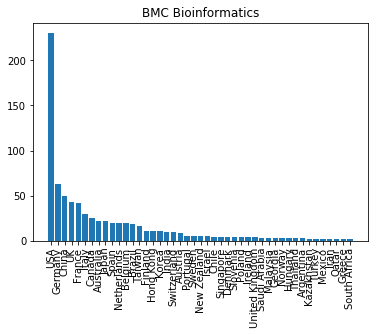

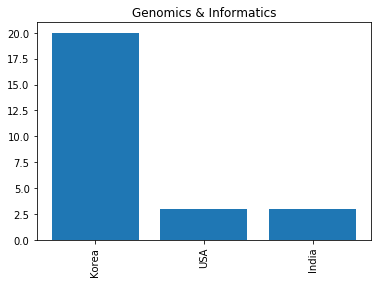

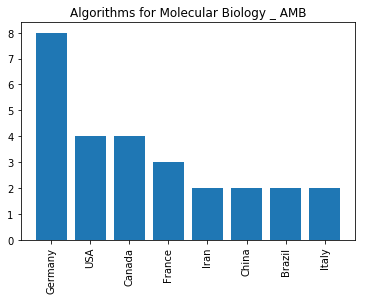

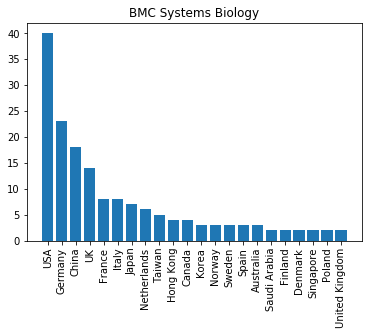

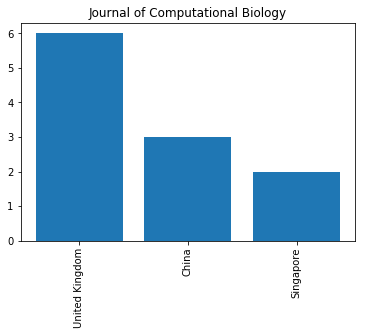

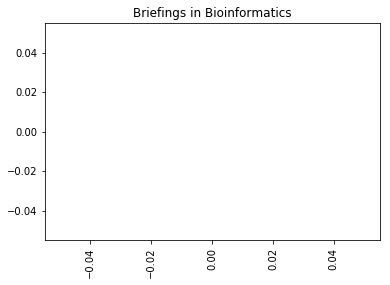

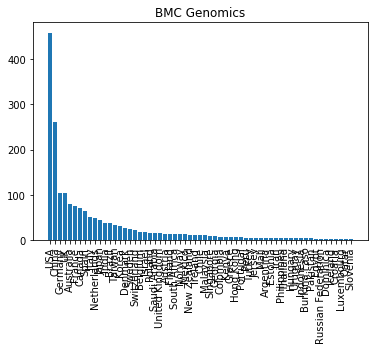

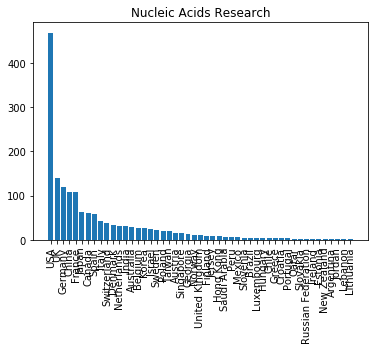

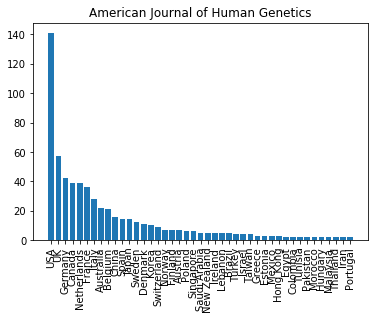

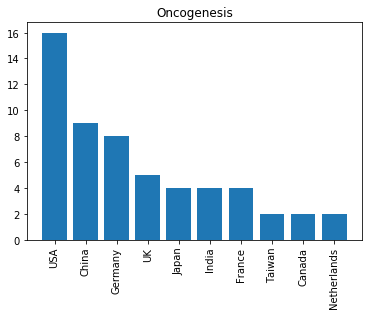

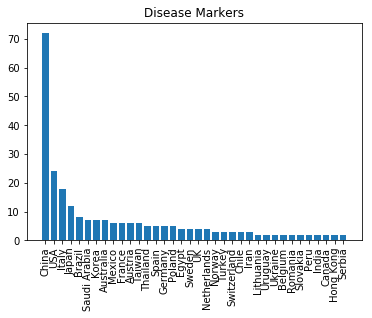

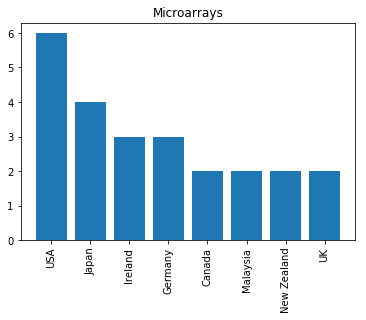

In [42]:
for i in range(12):
    frequency = {}
    match_pattern = re.findall(r'\b[A-za-z\s]{2,20}', journal_country[i])
 
    for word in match_pattern:
        count = frequency.get(word,0)
        frequency[word] = count + 1
     
    frequency_list = frequency.keys()
    
    top = {}
    for words in frequency_list:
        if(frequency[words]>1):
            top[words]= frequency[words]

    res = sorted(top.items(),key=f2)
    res = sorted(top.items(),key=(lambda x:x[1]),reverse=True)
    
    sorts=[]
    sorts_count = []
    for j in range(len(res)):
        sorts.append(res[j][0])
        sorts_count.append(res[j][1])
            
    plt.title(journalList[i])
    plt.xticks(rotation=90)
    plt.bar(sorts,sorts_count)
    plt.show()


## 모든 저널 국적분포

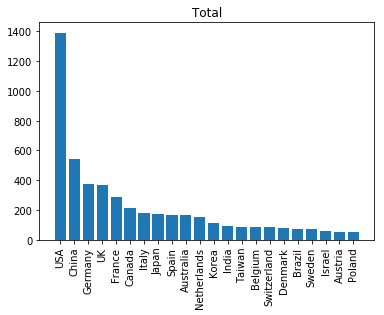

In [67]:
frequency = {}
for i in range(12):
    match_pattern = re.findall(r'\b[A-za-z\-]{2,20}', journal_country[i])
 
    for word in match_pattern:
        count = frequency.get(word,0)
        frequency[word] = count + 1
     
    frequency_list = frequency.keys()
    
    #print(len(frequency_list))

def f2(x):
    return x[1]

    
total = {}
for words in frequency_list:
    if(frequency[words]>50):
        total[words]= frequency[words]
        #print(words, frequency[words])
res = sorted(total.items(),key=f2)
res = sorted(total.items(),key=(lambda x:x[1]),reverse=True)
    
sorted_tot=[]
sorted_tot_count = []
for i in range(len(res)):
     sorted_tot.append(res[i][0])
     sorted_tot_count.append(res[i][1])
plt.title('Total')
plt.xticks(rotation=90)
plt.bar(sorted_tot,sorted_tot_count)
plt.show()

# 나라별 워드클라우드

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [45]:
list_2015.head()

,journal,TI,AB,AD,country
0,BMC Bioinformatics,Multi-label multi-instance transfer learning f...,Signaling pathways play important roles in the...,0000 0004 1759 8467grid.263484.fSoftware Colle...,[China]
1,BMC Bioinformatics,BigQ: a NoSQL based framework to handle genomi...,Precision medicine requires the tight integrat...,Dipartimento di Ingegneria Industriale e dell’...,"[Italy, USA]"
2,BMC Bioinformatics,Pathosphere.org: pathogen detection and charac...,The detection of pathogens in complex sample b...,0000 0000 9091 7592grid.418402.bBiosciences Di...,[USA]
3,BMC Bioinformatics,"Treelink: data integration, clustering and vis...",Phylogenetic trees are central to a wide range...,"Faculty of Engineering and Sciences, Universid...",[Chile]
4,BMC Bioinformatics,MixChIP: a probabilistic method for cell type ...,Transcription factors (TFs) are proteins that ...,0000000108389418grid.5373.2Department of Compu...,[Finland]


### paper 별 가장 먼저 오는 country 추출

In [46]:
country_one = []
for i in range(4186):
    if(len(country_2015[i])>=1):
        country_one.append(country_2015[i][0])
    else:
        country_one.append('')

In [47]:
list_2015['country_one']=country_one

## USA

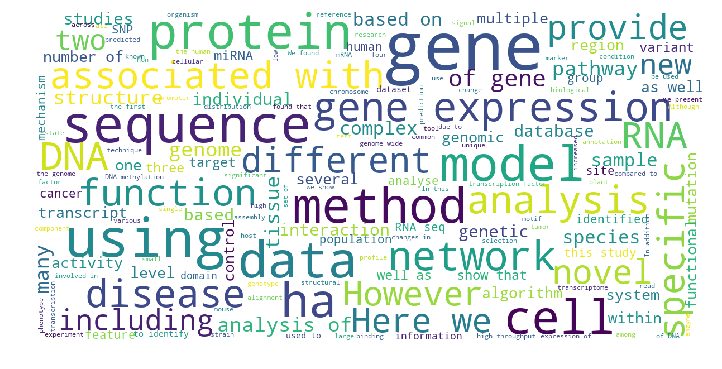

In [48]:
usa = list_2015[list_2015['country_one']=='USA']
usa_ab = ''.join(usa['AB'])
show_wordcloud(usa_ab)

## China

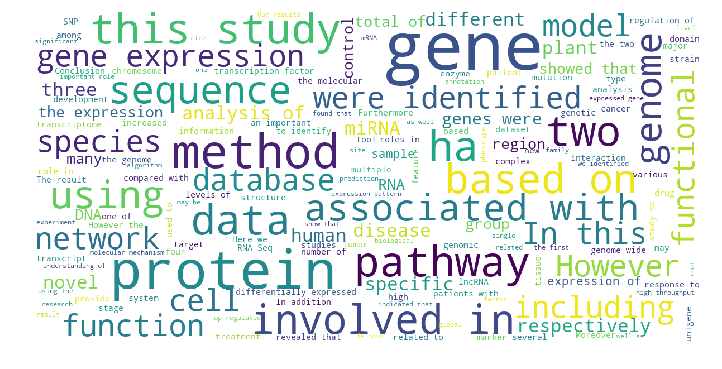

In [49]:
china = list_2015[list_2015['country_one']=='China']
china_ab = ''.join(china['AB'])
show_wordcloud(china_ab)

## Korea

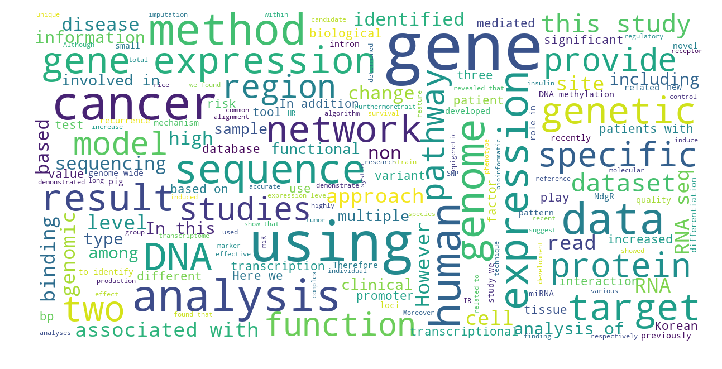

In [50]:
korea = list_2015[list_2015['country_one']=='Korea']
korea_ab = ''.join(korea['AB'])
show_wordcloud(korea_ab)

## Germany

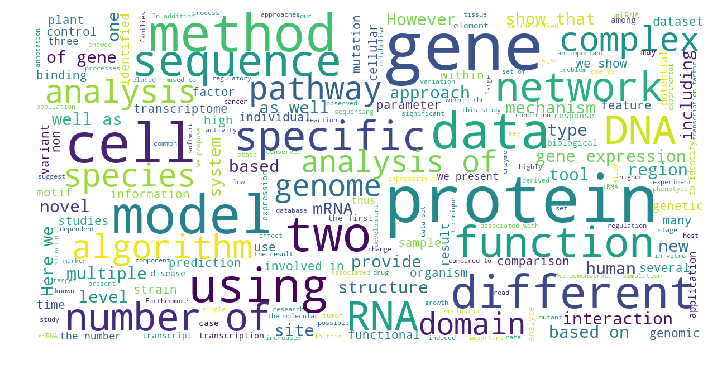

In [51]:
germany =list_2015[list_2015['country_one']=='Germany']
germany_ab = ''.join(germany['AB'])
show_wordcloud(germany_ab)

# 학과별 분석

In [52]:
dept_list = 'Physics,Electronic Engineering,Computer Science,Life Sciences,Mathematics,Statistics,Data Science,Biology'.split(',')

In [53]:
dept_list

['Physics',
 'Electronic Engineering',
 'Computer Science',
 'Life Sciences',
 'Mathematics',
 'Statistics',
 'Data Science',
 'Biology']

In [54]:
dept_2015=[]
for i in range(4186):
    item=[]
    for d in dept_list:
        if d in list_2015.iloc[i,3]:
            #print(i,country)
            item.append(d)
    dept_2015.append(item)

In [55]:
list_2015['dept']=dept_2015

In [56]:
d_2015 = []
for i in range(4186):
    if(len(dept_2015[i])>=1):
        d_2015.append(dept_2015[i][0])
    else:
        d_2015.append('')

In [57]:
list_2015['dept2']=d_2015

In [58]:
list_2015

,journal,TI,AB,AD,country,country_one,dept,dept2
0,BMC Bioinformatics,Multi-label multi-instance transfer learning f...,Signaling pathways play important roles in the...,0000 0004 1759 8467grid.263484.fSoftware Colle...,[China],China,[],
1,BMC Bioinformatics,BigQ: a NoSQL based framework to handle genomi...,Precision medicine requires the tight integrat...,Dipartimento di Ingegneria Industriale e dell’...,"[Italy, USA]",Italy,[],
2,BMC Bioinformatics,Pathosphere.org: pathogen detection and charac...,The detection of pathogens in complex sample b...,0000 0000 9091 7592grid.418402.bBiosciences Di...,[USA],USA,[],
3,BMC Bioinformatics,"Treelink: data integration, clustering and vis...",Phylogenetic trees are central to a wide range...,"Faculty of Engineering and Sciences, Universid...",[Chile],Chile,[],
4,BMC Bioinformatics,MixChIP: a probabilistic method for cell type ...,Transcription factors (TFs) are proteins that ...,0000000108389418grid.5373.2Department of Compu...,[Finland],Finland,[Computer Science],Computer Science
...,...,...,...,...,...,...,...,...
4181,Microarrays,?,The detection of small molecules by biosensors...,"Univ. Grenoble Alpes, INAC-SPRAM, F-38000 Gren...",[France],France,[],
4182,Microarrays,?,5-Aminolevulinic acid (ALA) is a precursor of ...,"Biomedical Research Institute, National Instit...",[Japan],Japan,[],
4183,Microarrays,?,Our group has been systematically investigatin...,"Division of Toxicology, Department of Pharmaco...",[Japan],Japan,[],
4184,Microarrays,?,?,?,[],,[],


# Computer Science

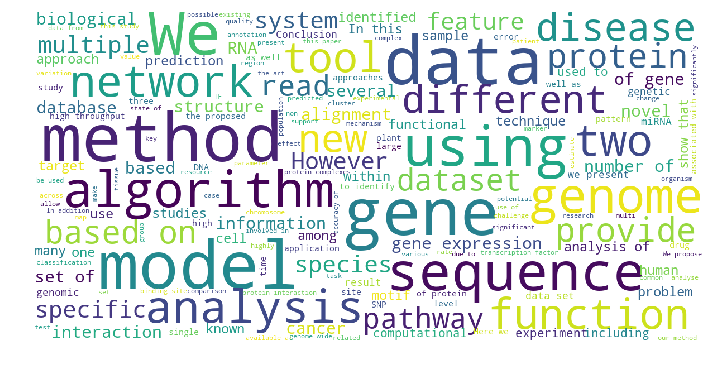

In [59]:
com = list_2015[list_2015['dept2']=='Computer Science']
com_ab = ''.join(com['AB'])
show_wordcloud(com_ab)

# Statistics

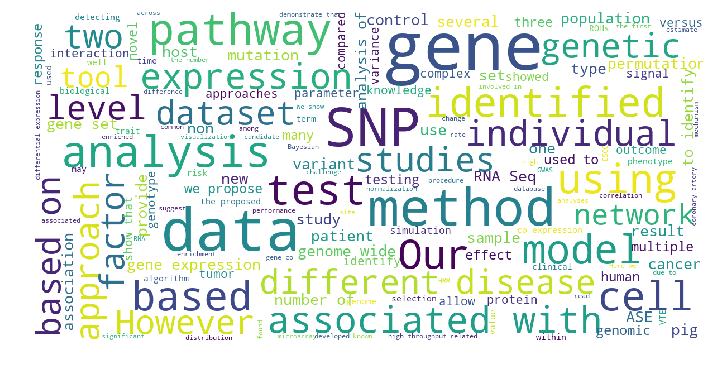

In [60]:
stat = list_2015[list_2015['dept2']=='Statistics']
stat_ab = ''.join(stat['AB'])
show_wordcloud(stat_ab)

# Life Science

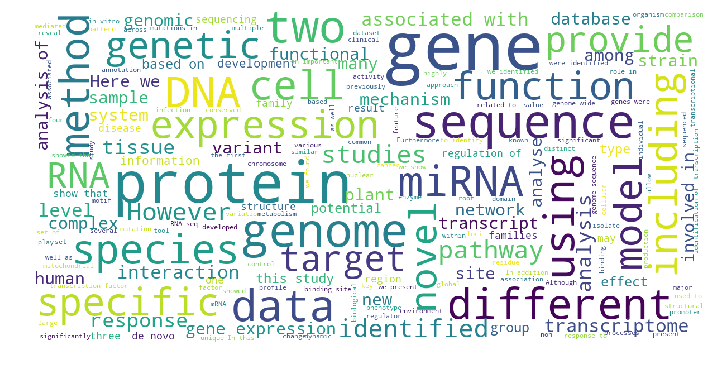

In [61]:
ls = list_2015[list_2015['dept2']=='Life Sciences']
ls_ab = ''.join(ls['AB'])
show_wordcloud(ls_ab)

# Biology

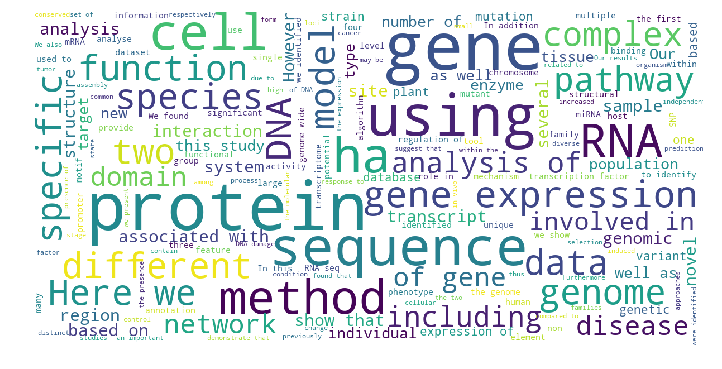

In [62]:
bio =list_2015[list_2015['dept2']=='Biology']
bio_ab = ''.join(bio['AB'])
show_wordcloud(bio_ab)

# Electronic Engineering

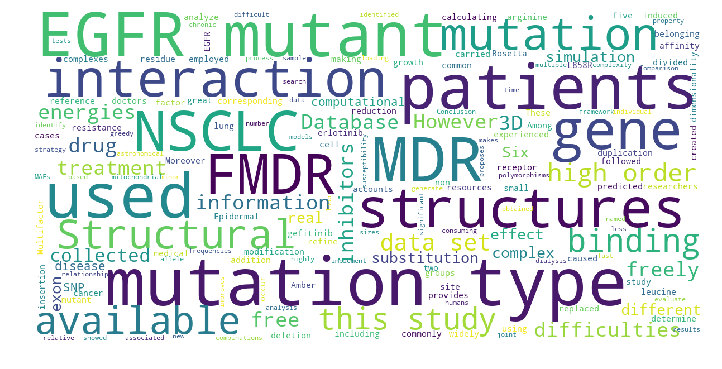

In [64]:
elec =list_2015[list_2015['dept2']=='Electronic Engineering']
elec_ab = ''.join(elec['AB'])
show_wordcloud(elec_ab)

# Mathematics

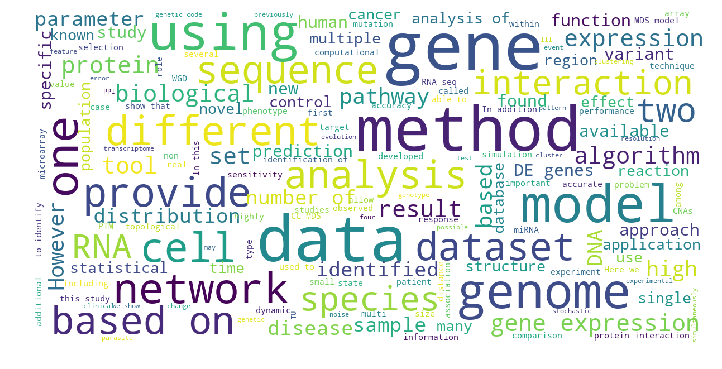

In [65]:
mat = list_2015[list_2015['dept2']=='Mathematics']
mat_ab = ''.join(mat['AB'])
show_wordcloud(mat_ab)

# Data Science

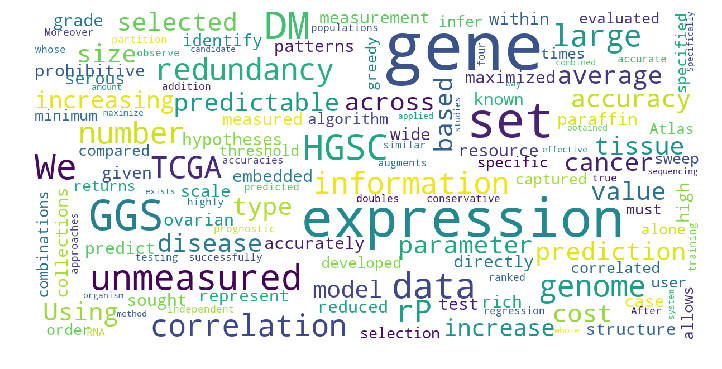

In [66]:
ds = list_2015[list_2015['dept2']=='Data Science']
ds_ab = ''.join(ds['AB'])
show_wordcloud(ds_ab)